#  Global $ CO_2 $
The first chapter in this book follows a case study on the concentration of $	extrm{CO}_2$ in the atmosphere. During the Covid-19 pandemic, many nations went into lockdown, reducing fossil fuel consumption. In turn, this precipitated a fall in global $	extrm{CO}_2$ production{cite}`Liu2020`. This Chapter is a walk-through of answering the question; can this effect be detected using global $	extrm{CO}_2$ concentration data? 

Almost half of the world's population was in lockdown by March of 2020. Thus, the effect we are looking for is after this. Additionally, the effect should be cumulative, with the tail end of the year showing the most significant depression in emissions. 

## Data Exploration
Clearly, without data, one is unable to provide an answer to the question. Therefore, the first task is gathering data and convincing oneself that it is worth working off. 

Before starting any analysis, ask the questions below. With each data set the exact questions will differ. However, it is crucial that you can convince yourself of the validity of your conclusions and that you can convince your readers aswell.
1.  Is the data reliable enough to make predictions from? 
    - For example, are there quantified errors in the measurments, and are they suitably low? Is this the correct dataset? 
2.  Is the data representative of the problem in question?
    - Could this data set answer the question? Does it cover a wide enough range of cases?

In [1]:
from dur_utils import colours #Durham Utilities module that stores constants like colours, can be found on _githublink_
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

```{tip}
Handling imports is typically done at the top of the file. The best practice is to avoid having redundant imports in a file. Avoiding double imports and redundant imports reduces the possibility of incompatibility errors.
```

The first section will collect data from the [NOAA/GML](https://gml.noaa.gov/ccgg/trends/gl_data.html){cite}`Tans1995,Conway1994`. There are multiple files on the website; [mean monthly csv](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.csv) was chosen. For this problem, greater resolution in each point is a boon. Further, in 'Extension and integration of atmospheric carbon dioxide data into a globally consistent measurement record'{cite}`Tans1995`, the approximate upper bound for the variation between Global monthly $	extrm{CO}_2$ is 0.5 ppm, across all measurements.  

 CSV or comma-separated variable files are a common way of storing tabular data. [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) both have functions which read CSVs. Pandas is much faster. 
```
pd.read_csv(file)
```
```
np.loadtxt(file, delimiter = ',')
```

In [2]:
path_global = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.csv'
co2_data_global = pd.read_csv(
    path_global, header=0, comment='#'
    )
null_sum = (co2_data_global.isna()).values.sum(axis=0)
pd.DataFrame(data=null_sum,
    index=co2_data_global.columns,
    columns=['Number of Null Values']
    )

,Number of Null Values
year,0
month,0
decimal,0
average,0
trend,0


Tabulating the number of null entries in each column provides a reference to column names and the number of missing entries. In this data, there are no Null fields.
Notably, none of the columns has units in their headers apart from years and months. On inspection of the website, the average column is a pseudo-unit quantity in parts per million. 

If there were large counts of null entries, a decision on whether to use the current dataset should be made. The effect of missing data has entire fields of research dedicated to it. There are multiple different statistical methods available to repopulate datasets. This, however, is beyond the remit of this text.  

When Displaying the ``` co2_data_global``` dataframe up to the first five rows, it can be seen that the decimal column is given by: 
$$
decimal = year + \frac{month}{12}
$$
This makes it straightforward to plot $	extrm{CO}_2$ average against time. 

In [3]:
co2_data_global.iloc[:5,:]

,year,month,decimal,average,trend
0,1980,1,1980.042,338.55,337.93
1,1980,2,1980.125,339.27,338.22
2,1980,3,1980.208,339.60,338.25
3,1980,4,1980.292,339.99,338.37
4,1980,5,1980.375,340.43,338.91


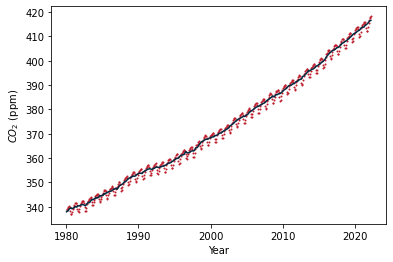

In [4]:
plt.plot(co2_data_global['decimal'], co2_data_global['average'],
        c=colours.durham.red, linestyle='',
        marker='o', markersize = 1
        )
plt.plot(co2_data_global['decimal'], co2_data_global['trend'],
        c=colours.durham.ink
        )
plt.ylabel('$	extrm{CO}_2$ (ppm)')
plt.xlabel('Year')
None

By plotting the monthly average against time and the trendline provided shows a consistent increase in the average concentration of $	extrm{CO}_2$ in the atmosphere over the last 40 years. In addition, a cyclical pattern over a shorter timescale is also observed. The data set is well populated over the time period for predictions on the few years scale. Thus

There is an additional data set from Mauna Loa {cite}`Tans1989`, which is worth comparing to global averages. Notably, these data sets are not expected to correspond precisely as $	extrm{CO}_2$ concentration is a function of altitude, latitude and longitude.

In this case, we know that the surface average $	extrm{CO}_2$ is taken from multiple sea-level sites. Each site is part of the Cooperative Global Air Sampling Network{cite}`. These sites have been chosen to minimise the interference of local effects in the amount of atmospheric $	extrm{CO}_2$. 

There can be no hard and fast rule for how many data sources are required to make predictions. However, with more independent sets of data, confidence in the generality of predictions can increase. Further, both of these datasets come from peer-reviewed sources. Thus their methodology has been independantly certified.   

 

In [5]:
path_ml =  'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv'              
co2_data_ml = pd.read_csv(path_ml, header=0, comment='#')
null_sum = (co2_data_ml.isna()).values.sum(axis=0)
neg_sum = (co2_data_ml < 0).values.sum(axis = 0)
pd.DataFrame(data= np.vstack((null_sum, neg_sum)).transpose(),
    index=co2_data_ml.columns,
    columns=['Number of Null Values', 'Number of Negative Values']
    )

,Number of Null Values,Number of Negative Values
year,0,0
month,0,0
decimal date,0,0
average,0,0
deseasonalized,0,0
ndays,0,195
sdev,0,196
unc,0,196


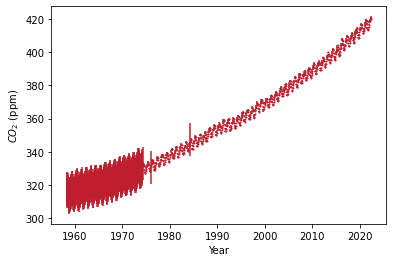

In [6]:
plt.errorbar(co2_data_ml['decimal date'], co2_data_ml['average'], co2_data_ml['sdev'],
        c = colours.durham.red, linestyle='',
        marker='o', markersize = 1
        )
plt.ylabel('$	extrm{CO}_2$ (ppm)')
plt.xlabel('Year')
None

The weekly Mauna Loa data contains more fields than the global average data. However, the decimal format is still available. In this dataset, recordings before 1980 have unknown associated standard error. 

In [7]:
invalid_values = np.sum(co2_data_ml['sdev']<0)
iv_fraction = invalid_values / co2_data_ml.shape[0]
print(' Number of discarded data points:', invalid_values,
    ', Fraction of Total Values:', f'{iv_fraction:.2}'
    )


 Number of discarded data points: 196 , Fraction of Total Values: 0.25


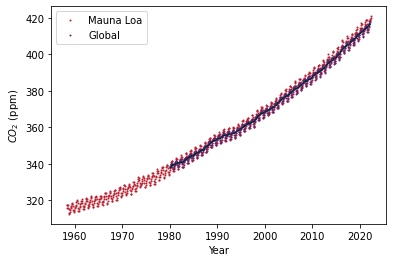

In [8]:
co2_data_ml = co2_data_ml[co2_data_ml['average']>0] 
#Plotting
plt.plot(co2_data_ml['decimal date'], co2_data_ml['average'],
        c = colours.durham.red, linestyle='',
        marker='o', markersize = 1, 
        label = 'Mauna Loa'
        )
plt.plot(co2_data_global['decimal'], co2_data_global['average'], 
        c=colours.durham.purple, linestyle='', marker='o', markersize = 1, label = 'Global'
        )
plt.plot(co2_data_global['decimal'], co2_data_global['trend'], 
        c=colours.durham.ink
        ) 
plt.ylabel('$	extrm{CO}_2$ (ppm)')
plt.xlabel('Year')
plt.legend()
None

### Next steps
After acquiring both data sets, non-physical values and missing fields were removed. On brief inspection, both datasets follow a similar trend and describe an increase in global $	extrm{CO}_2$, with a consistent oscillation. Finally, both datasets include the time period of interest, 2020-2021. 

Regarding dataset reliability, these datasets are averages over time series fits from data collected hourly. This data is challenging to determine sensible standard errors on the monthly mean values. Daily variance is of the order of a few ppm due to a variety of factors. An example day and data collection process are documented [here](https://gml.noaa.gov/ccgg/about/co2_measurements.html). However, the standard deviations of the measurements for Mauna Loa are provided. These are obtained from weekly and daily fits. Such quantification of the data's precision is required to determine the significance of any events, enabling observation of a trend change indicative of Covid-19.

The global data lacks a standard error. There is an expected variance between testing sites in both the timing and magnitude of oscilations, which can be read further about [here](https://gml.noaa.gov/ccgg/about/global_means.html). Due to the nature of the global data, using the monthly Mauna Loa data for the main analysis and having the global data as a touchstone seems prudent. At this point, the author is sufficiently convinced that they have obtained a dataset that is fit for purpose in the Mauna Loa dataset. 

